# Week 4 handin - by Benjamin S (cph-bs190)

## Assigment

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020

## Status
All exercises complete, HOWEVER - I couldn't find the file mentioned in exercise 2.4 (BY_KODER_demographics.csv), but found a similar one named "DKstat_bykoder.csv" which I used instead.

# Exercise 1
### 1 - 3

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1 -2
filename = "testfiles/befkbhalderstatkode.csv"
data = np.genfromtxt(filename, delimiter=",", dtype=np.uint, skip_header=1)
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

# 3
pop_dict = {}
for key, value in neighb.items():
    pop_mask = (data[:,0] == 2015) & (data[:,1] == key)
    area_pop = np.sum(data[pop_mask][:,4])
    pop_dict[value] = area_pop
    print("Population in", value, "in 2015:", area_pop)

Population in Indre By in 2015: 51937
Population in Østerbro in 2015: 75113
Population in Nørrebro in 2015: 78802
Population in Vesterbro/Kgs. Enghave in 2015: 61623
Population in Valby in 2015: 51727
Population in Vanløse in 2015: 39537
Population in Brønshøj-Husum in 2015: 43908
Population in Bispebjerg in 2015: 53604
Population in Amager Øst in 2015: 55205
Population in Amager Vest in 2015: 64967
Population in Udenfor in 2015: 3872


### 4

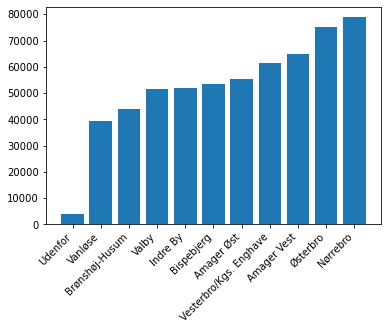

In [21]:
sorted_dict = dict(sorted(pop_dict.items(), key=lambda item: item[1]))
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

### 5 - 6

In [22]:
age_mask = (data[:,0] == 2015) & (data[:,2] > 65)
print("\nNumber of people above 65 years old in CPH in 2015:", np.sum(data[age_mask][:,4]))

p_above_65 = data[age_mask]
nordic_codes_ex_dk = [5101, 5104, 5106, 5110, 5120, 5901, 5902]
total = 0

for code in nordic_codes_ex_dk:
    country_mask = p_above_65[:,3] == code
    total += np.sum(p_above_65[country_mask][:,4])

print("Of those,", total, "were from other Nordic countries (excluding Denmark)\n")


Number of people above 65 years old in CPH in 2015: 55750
Of those, 608.0 were from other Nordic countries (excluding Denmark)



### 7

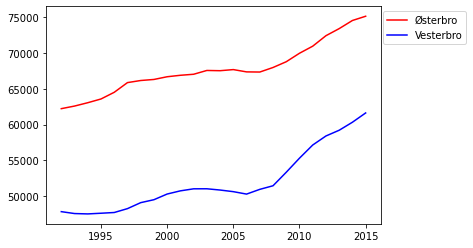

In [23]:
østerbro_dict = {}
vesterbro_dict = {}
unique_years = list(np.unique(data[:,0]))

for year in unique_years:
    østerbro_mask = (data[:,0] == year) & (data[:,1] == 2) # see neighb dict in 1.1 - 2 = Østerbro
    vesterbro_mask = (data[:,0] == year) & (data[:,1] == 4) # see neighb dict in 1.1 - 4 = Vesterbro
    østerbro_dict[year] = np.sum(data[østerbro_mask][:,4])
    vesterbro_dict[year] = np.sum(data[vesterbro_mask][:,4])

fig = plt.figure()
ax = fig.add_subplot()
øb = ax.plot(list(østerbro_dict.keys()), list(østerbro_dict.values()), color="red")
vb = ax.plot(list(vesterbro_dict.keys()), list(vesterbro_dict.values()), color="blue")
plt.legend((øb[0], vb[0]), ("Østerbro", "Vesterbro"), loc="upper right", bbox_to_anchor=(1.27, 1))
plt.show()

# Exercise 2 (extra)
### 1 - 3

In [24]:
import pandas as pd 

# url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'
# df = pd.read_csv(url,sep=';')
# df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
# df.to_csv('testfiles/demographic_cleaned.csv',header=False, index=False)

filename = "testfiles/demographic_cleaned.csv"
dem_data = np.loadtxt(filename, delimiter=",", dtype=np.uint)

### 4

In [25]:
import csv

# tried with pandas but couldn't get it to work, so did it like this instead
unique_city_codes = list(np.unique(dem_data[:,0]))
city_dict = {}
city_names = []

with open("testfiles/DKstat_bykoder.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        row[0] = int(row[0])
        city_names.append(row)

for city_code in unique_city_codes:
    for city_info in city_names:
        if city_code == city_info[0]:
            city_dict[city_code] = city_info[1]


print(city_dict)
    


{0: ' Hele-landet', 81: ' Region-Nordjylland', 82: ' Region-Midtjylland', 83: ' Region-Syddanmark', 84: ' Region-Hovedstaden', 85: ' Region-Sjælland', 147: ' Frederiksberg', 400: ' Bornholm', 461: ' Odense', 561: ' Esbjerg', 751: ' Aarhus', 851: ' Aalborg'}


### 5

In [26]:
def get_city_w_highest_pct_of_m():
    m_list = []
    pct_male = {"city": "", "pct": 0}

    for key, value in city_dict.items():
        city_mask = (dem_data[:,3] == 2020) & (dem_data[:,0] == key)
        pop_list = dem_data[city_mask]

        male_mask = (pop_list[:,1] == 1) & (pop_list[:,0] == key)
        m_list.append({"city_code": key, "city": value, "total": np.sum(pop_list[:,4]), "males": np.sum(pop_list[male_mask][:,4])})

    for p_dict in m_list:
        # Excluding regions and entire country - codes go from 000 to 085 for those
        if p_dict["city_code"] > 85:
            pct = (p_dict["males"] / p_dict["total"]) * 100
            if (pct_male["pct"] < pct):
                pct_male["city"] = p_dict["city"]
                pct_male["pct"] = pct

    print("City with highest percentage of men in 2020:", pct_male["city"], ", percentage:", pct_male["pct"], "%")    
        

get_city_w_highest_pct_of_m()

City with highest percentage of men in 2020:  Aalborg , percentage: 50.41119110374309 %


### 6

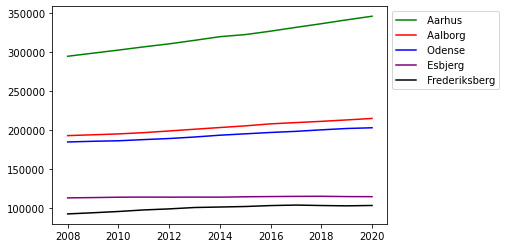

In [27]:
unique_years = list(np.unique(dem_data[:,3]))
city_dict_list = [{}, {}, {}, {}, {}]
city_dict_codes = []
city_pops = []
colors = ["green", "red", "blue", "purple", "black"]

for key in city_dict.keys():
    # Same as last exercise
    if key > 85:
         city_mask = (dem_data[:,0] == key) & (dem_data[:,3] == 2008)
         city_pops.append({"city_code": key, "pop": np.sum(dem_data[city_mask][:,4])})

def n_largest(n): 
    res_list = []

    for i in range(0, n):  
        max = 0
        city = {}
          
        for j in range(len(city_pops)):      
            if city_pops[j]["pop"] > max: 
                max = city_pops[j]["pop"]
                city = city_pops[j]; 
                  
        city_pops.remove(city); 
        res_list.append(city) 

    return res_list

for idx, city in enumerate(n_largest(5)):
    city_dict_codes.append(city["city_code"])
    for year in unique_years:
        y_mask = (dem_data[:,3] == year) & (dem_data[:,0] == city["city_code"])
        city_dict_list[idx][year] = np.sum(dem_data[y_mask][:,4])


fig = plt.figure()
ax = fig.add_subplot()

for idx, city in enumerate(city_dict_list):
   line = ax.plot(list(city.keys()), list(city.values()), label=city_dict[city_dict_codes[idx]], color=colors[idx])
    
plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1))
plt.show()

